In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')

from Layers.DMWT import *
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 40

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [3]:
# load DWT db2 model
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

x_input = layers.Input(shape=input_shape)
x = DMWT()(x_input)
x = layers.Conv2D(56, (3, 3), padding='same', activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(nb_classes, activation="softmax")(x)

model = Model(x_input, x, name="mymodel")
model.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dmwt (DMWT)                  (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 56)        560       
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 56)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175616)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1756170   
Total params: 1,756,730
Trainable params: 1,

In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 - 28s - loss: 1.1471 - acc: 0.7677 - val_loss: 0.5164 - val_acc: 0.8744
Epoch 2/40
48000/48000 - 27s - loss: 0.4721 - acc: 0.8740 - val_loss: 0.3755 - val_acc: 0.8978
Epoch 3/40
48000/48000 - 27s - loss: 0.3932 - acc: 0.8898 - val_loss: 0.3358 - val_acc: 0.9058
Epoch 4/40
48000/48000 - 27s - loss: 0.3626 - acc: 0.8964 - val_loss: 0.3164 - val_acc: 0.9094
Epoch 5/40
48000/48000 - 27s - loss: 0.3425 - acc: 0.9014 - val_loss: 0.3019 - val_acc: 0.9133
Epoch 6/40
48000/48000 - 27s - loss: 0.3290 - acc: 0.9055 - val_loss: 0.2912 - val_acc: 0.9168
Epoch 7/40
48000/48000 - 27s - loss: 0.3169 - acc: 0.9093 - val_loss: 0.2824 - val_acc: 0.9193
Epoch 8/40
48000/48000 - 27s - loss: 0.3061 - acc: 0.9114 - val_loss: 0.2752 - val_acc: 0.9215
Epoch 9/40
48000/48000 - 27s - loss: 0.2979 - acc: 0.9140 - val_loss: 0.2670 - val_acc: 0.9247
Epoch 10/40
48000/48000 - 27s - loss: 0.2892 - acc: 0.9167 - val_loss: 0.2621 - val_acc: 0.9260

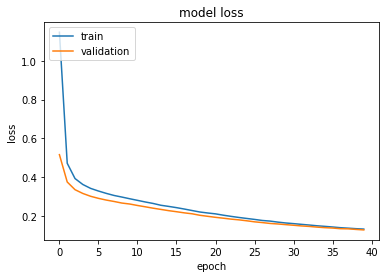

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()